In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [194]:
data = pd.read_csv("data.csv")

In [195]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [196]:
data.shape

(569, 33)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [198]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [199]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [200]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [201]:
data = data.drop('Unnamed: 32', axis=1)

In [202]:
numeric_col=data.select_dtypes(include=['int64','float64'])

In [203]:
numeric_col.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [204]:
data_copy=data.copy()

In [205]:
data_copy=data_copy.drop(['id','diagnosis'],axis=1)

In [206]:
data_copy.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [207]:
data_copy.to_csv("cleaned_data.csv", index=False)

In [208]:
skewness=data_copy.skew()
print(skewness)

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [209]:
from sklearn.preprocessing import PowerTransformer

In [210]:
for col in skewness.index:
    if (skewness[col] > 0.5) or (skewness[col] < -0.5):
        # Only transform if values are non-negative and all >0
        if (data_copy[col] > 0).all():  
            data_copy[col] = np.log1p(data_copy[col])
        # If values are >= 0, you can use np.log1p safely
        elif (data_copy[col] >= 0).all():
            data_copy[col] = np.log1p(data_copy[col])
        else:
            pt = PowerTransformer(method='yeo-johnson')
            data_copy[col] = pt.fit_transform(data_copy[[col]])

In [211]:
data_copy.skew()

radius_mean                0.348744
texture_mean               0.018733
perimeter_mean             0.328800
area_mean                  0.287328
smoothness_mean            0.456324
compactness_mean           1.043195
concavity_mean             1.206982
concave points_mean        1.083180
symmetry_mean              0.632718
fractal_dimension_mean     1.272294
radius_se                  1.713417
texture_se                 0.629526
perimeter_se               1.025375
area_se                    0.847298
smoothness_se              2.283394
compactness_se             1.816278
concavity_se               4.231738
concave points_se          1.399869
symmetry_se                2.135874
fractal_dimension_se       3.874373
radius_worst               0.506347
texture_worst              0.498321
perimeter_worst            0.462758
area_worst                 0.457614
smoothness_worst           0.415426
compactness_worst          1.048729
concavity_worst            0.717939
concave points_worst       0

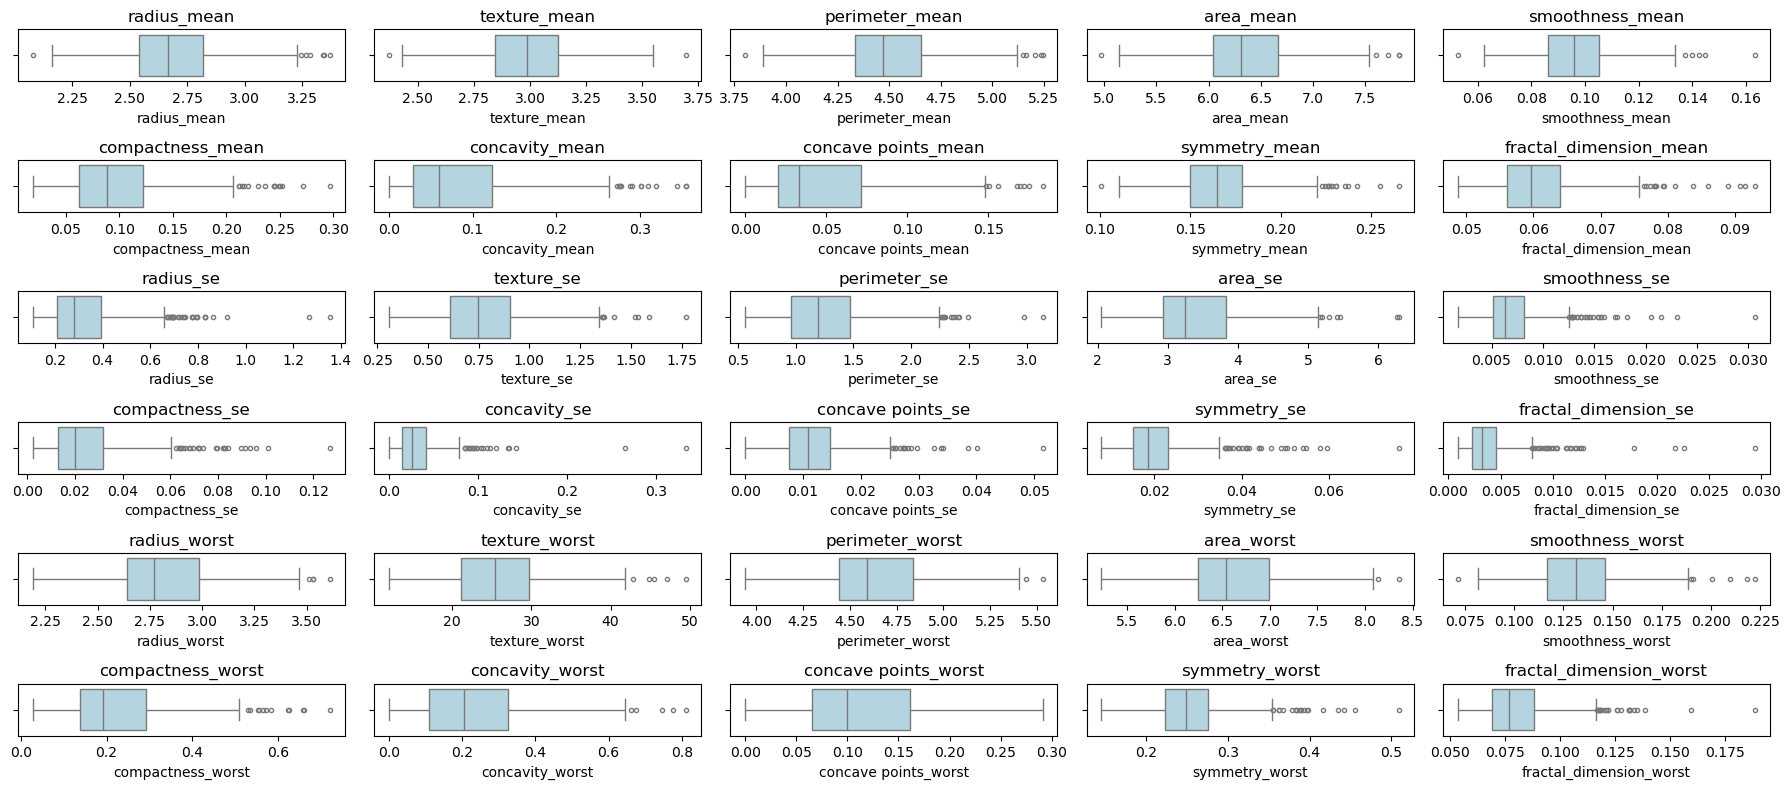

In [212]:
import math

num_col = data_copy.columns
n = len(num_col)
rows = math.ceil(n / 5)

plt.figure(figsize=(18, 8))
for i, col in enumerate(num_col, 1):
    plt.subplot(rows, 5, i)
    sns.boxplot(x=data_copy[col], color='lightblue', fliersize=3)
    plt.title(col)

plt.tight_layout()
plt.show()

In [213]:
outlier_counts = {}
for col in data_copy.columns:
    Q1 = data_copy[col].quantile(0.25)
    Q3 = data_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_copy[(data_copy[col] < lower_bound) | (data_copy[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]
print("Outlier counts per column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outlier counts per column:
radius_mean: 7
texture_mean: 2
perimeter_mean: 6
area_mean: 5
smoothness_mean: 6
compactness_mean: 15
concavity_mean: 14
concave points_mean: 8
symmetry_mean: 15
fractal_dimension_mean: 15
radius_se: 31
texture_se: 9
perimeter_se: 13
area_se: 7
smoothness_se: 29
compactness_se: 26
concavity_se: 22
concave points_se: 18
symmetry_se: 27
fractal_dimension_se: 28
radius_worst: 4
texture_worst: 5
perimeter_worst: 2
area_worst: 2
smoothness_worst: 7
compactness_worst: 12
concavity_worst: 5
concave points_worst: 0
symmetry_worst: 20
fractal_dimension_worst: 23


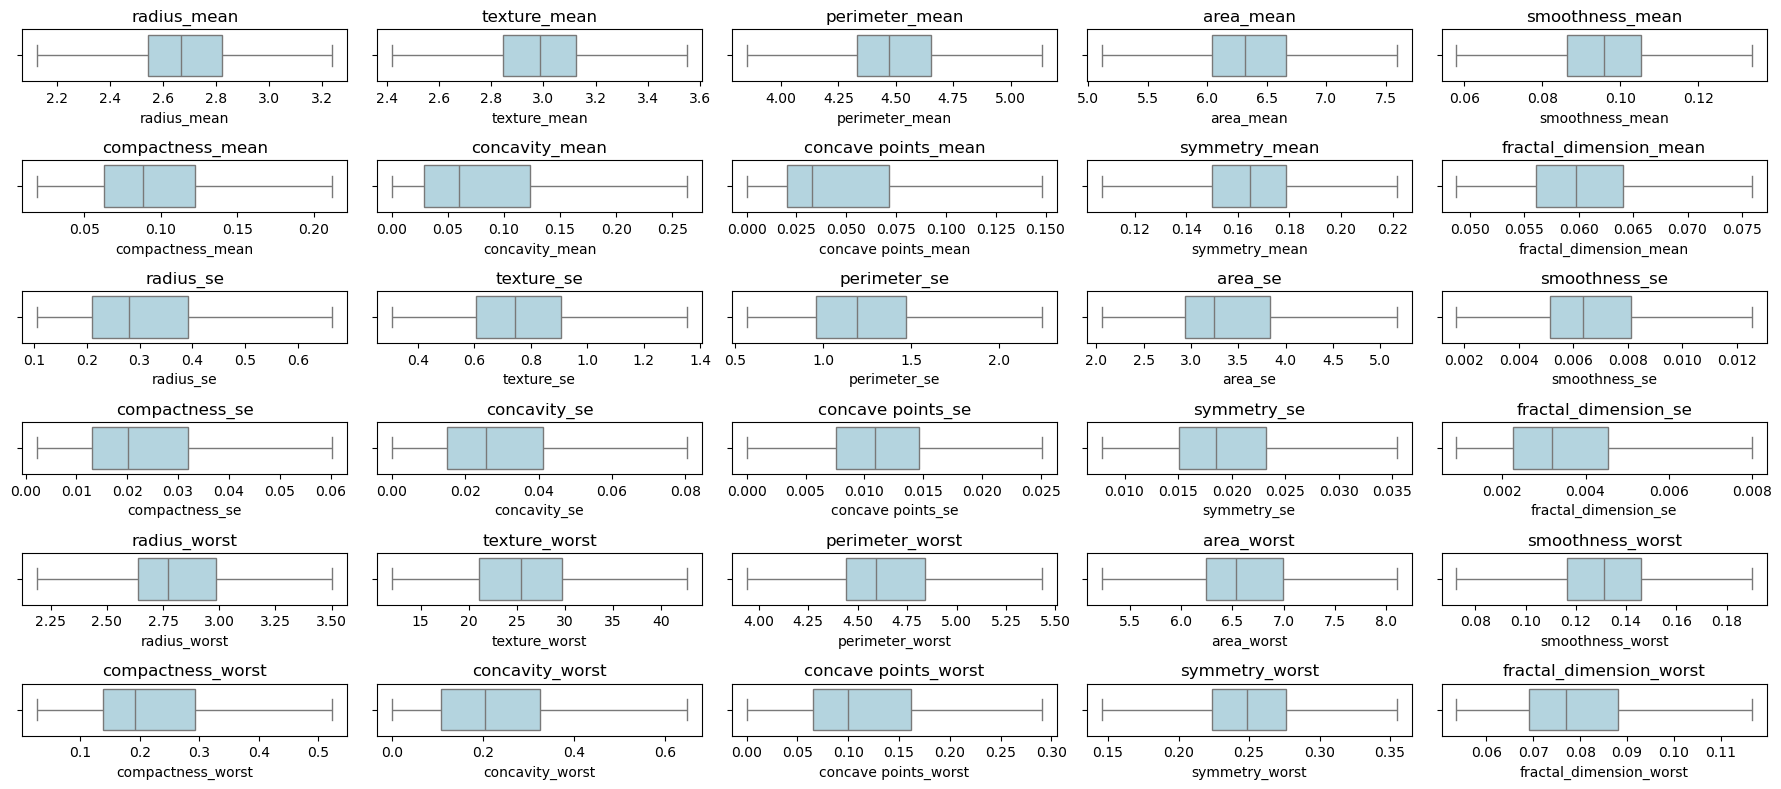

In [214]:
for col in data_copy.columns:
    Q1 = data_copy[col].quantile(0.25)
    Q3 = data_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data_copy[col] = np.clip(data_copy[col], lower, upper)

num_col = data_copy.columns
n = len(num_col)
rows = math.ceil(n / 5)

plt.figure(figsize=(18, 8))
for i, col in enumerate(num_col, 1):
    plt.subplot(rows, 5, i)
    sns.boxplot(x=data_copy[col], color='lightblue', fliersize=3)
    plt.title(col)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Iris Dataset')

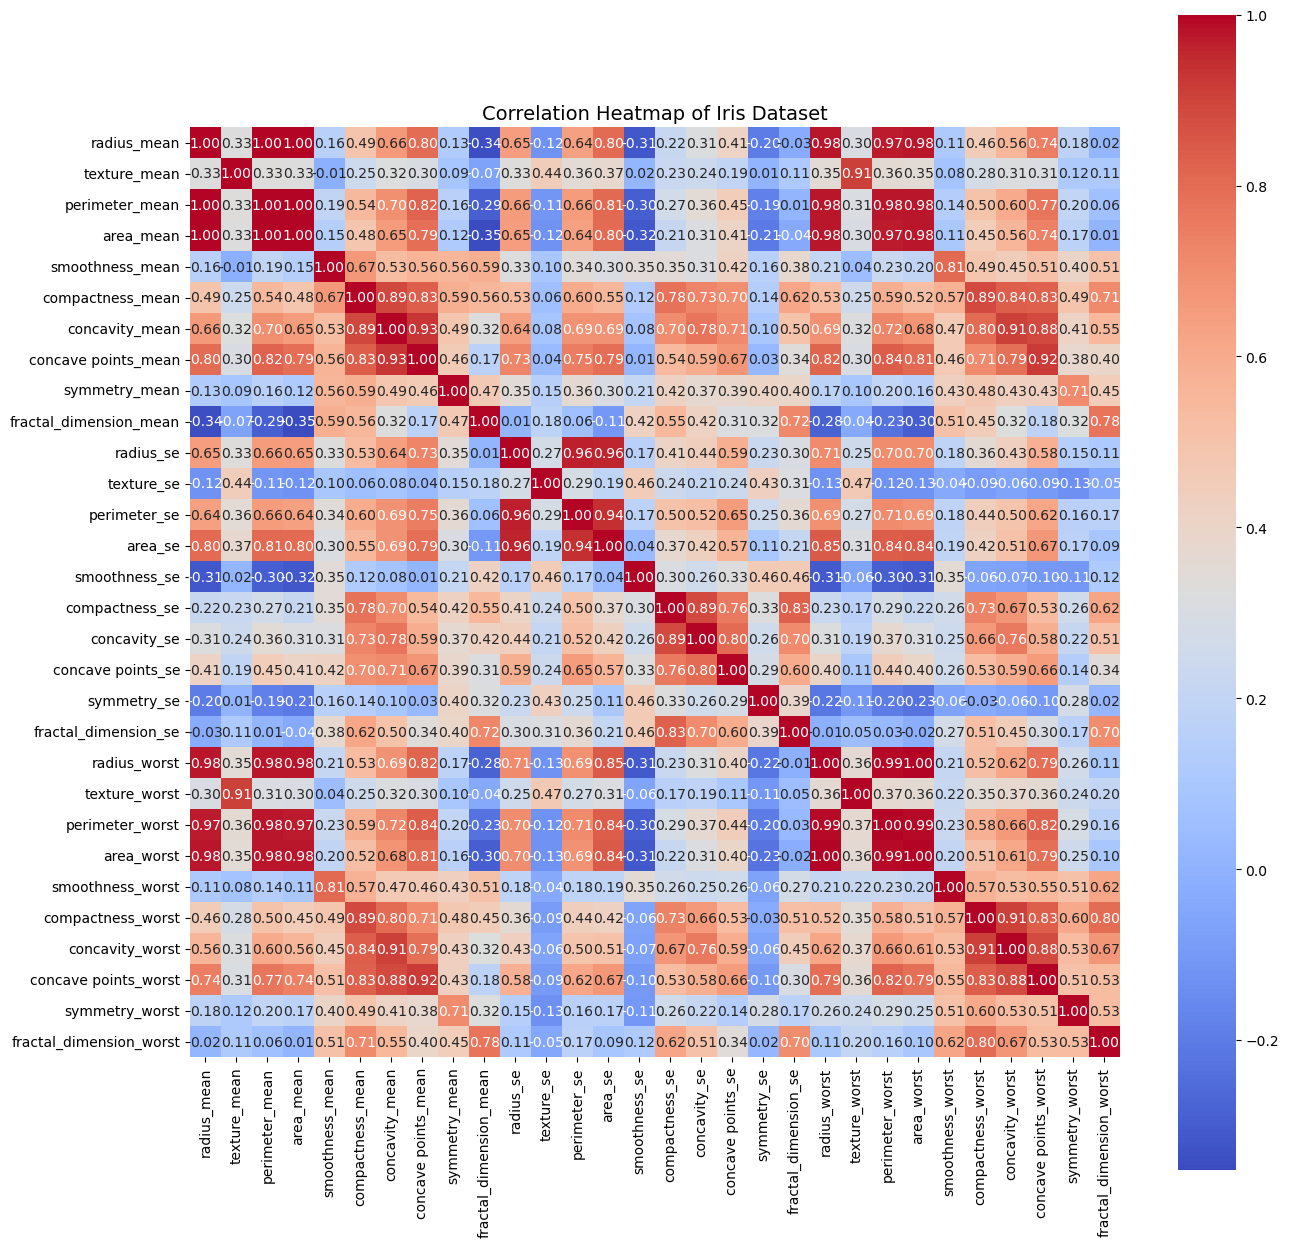

In [215]:
corr_matrix = data_copy.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Iris Dataset", fontsize=14)

In [216]:
from sklearn.decomposition import PCA

In [217]:
X = data_copy
y = data["diagnosis"]
le = LabelEncoder()
y_encoded = le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca , y_encoded, test_size=0.2, random_state=42)
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

c:\Users\Nagaprasad M\anaconda4\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5989 - loss: 0.6462 - val_accuracy: 0.7582 - val_loss: 0.5500
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7473 - loss: 0.5305 - val_accuracy: 0.9121 - val_loss: 0.4192
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8297 - loss: 0.4330 - val_accuracy: 0.9451 - val_loss: 0.3343
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8626 - loss: 0.3667 - val_accuracy: 0.9560 - val_loss: 0.2769
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9038 - loss: 0.3001 - val_accuracy: 0.9451 - val_loss: 0.2373
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9258 - loss: 0.2585 - val_accuracy: 0.9451 - val_loss: 0.2081
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9066 - loss: 0.2365 - val_accuracy: 0.9451 - val_loss: 0.1849
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9505 - loss: 0.2021 - val_accuracy: 0.9451 - v

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001B7799DC5E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


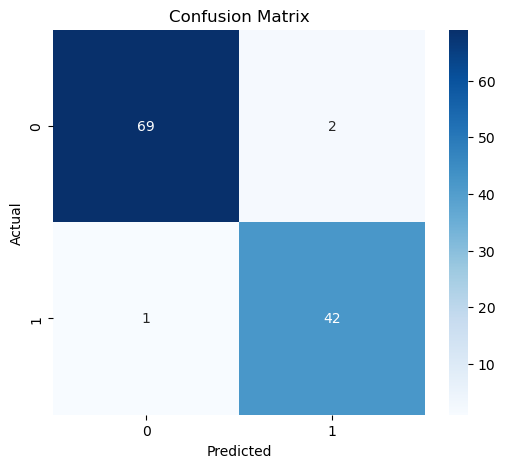


Classification Report:
              precision    recall  f1-score   support

           0     0.9857    0.9718    0.9787        71
           1     0.9545    0.9767    0.9655        43

    accuracy                         0.9737       114
   macro avg     0.9701    0.9743    0.9721       114
weighted avg     0.9740    0.9737    0.9737       114


ROC-AUC Score: 0.9974


In [218]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

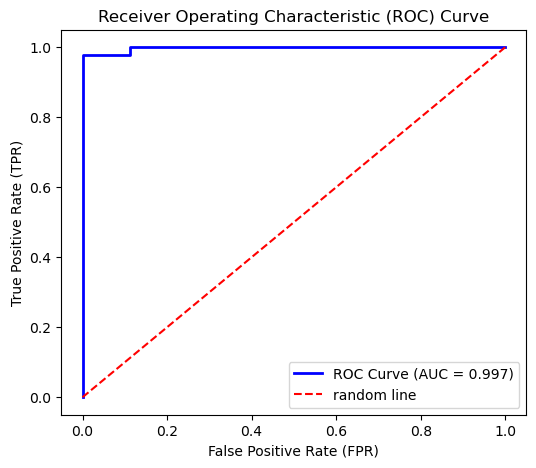

In [219]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='random line') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [221]:

import joblib
import tensorflow as tf
# Save trained model
model.save("model.h5")

# Save label encoder and scaler
joblib.dump(le, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(X.columns.tolist(), "feature_names.pkl")

['feature_names.pkl']